# 딥러닝 기본 요소

## 노드(뉴런)

딥러닝 인공지능은 뉴런을 본따 만든 노드들을 연결하고, 노드들의 가중치를 자동으로 학습하는 네트워크 구조를 가진다.

### 퍼셉트론 (Perceptron) 함수

딥러닝 노드의 가장 기본적인 형태는 퍼셉트론이라고 하는 계단 함수이다. 퍼셉트론은 일정 이상의 입력이 들어오면 신호를 내보내고 그렇지 않으면 신호를 보내지 않는 계단형태의 함수이다.

퍼셉트론은 0을 기준으로 음수가 입력되면 0, 양수가 입력되면 1의 출력을 내보내는 조건을 사용하여 설계할 수 있다.

In [2]:
import numpy as np # 넘파이 모듈
import matplotlib.pylab as plt # 그래프 모듈

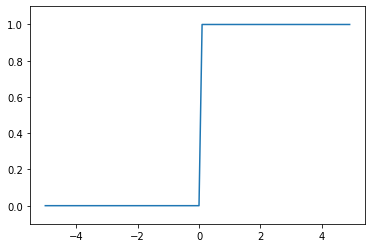

In [4]:
def step_fn(x):
    return np.array(x>0, dtype=np.int)

x=np.arange(-5.0, 5.0, 0.1) # -0.5에서 0.5 전까지 0.1간격의 numpy 배열을 생성
y = step_fn(x) # step_fn에 x배열을 넘겨받고 계단함수를 실행하여 결과를 y에 돌려준다.

# 그래프작성
plt.plot(x,y) # x,y로 그래프 생성
plt.ylim(-0.1,1.1) # y축 범위 지정
plt.show()

딥러닝 네트워크는 이렇게 설계된 뉴런들을 연결하여 입력층, 은닉층, 출력층을 구성하고 각각의 가중치를 자동으로 학습하게 된다.

퍼셉트론은 가장 기본적인 노드이며 이후 나오는 노드들 또한 활성화 함수의 방식만 다를 뿐 같은 역할을 수행한다.

### 시그모이드 (Sigmoid) 함수

로지스틱(Logistic) 함수라고도 불리며 비선형 값을 얻지 못하는 퍼셉트론 함수의 한계를 극복하기 위해 사용하기 시작하였다.

시그모이드 함수는 다음과 같이 구성된다.

    σ(x) = 1/ 1+e^(−x)
    σ'(x)=σ(x)(1−σ(x))

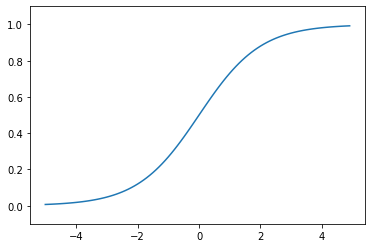

In [5]:
def sigmoid(x):
    return 1 / (1+np.exp(-x)) # 시그모이드 함수 공식으로 쉽게 구현 가능하다.
# 넘파이 브로드캐스트 기능으로 배열과 스칼라값의 연산을 넘파이 배열의 원소 각각과 스칼라값의 연산으로 바꿔 수행해준다.

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

# 그래프작성
plt.plot(x,y) # x,y로 그래프 생성
plt.ylim(-0.1, 1.1) # y축 범위 지정
plt.show()

### 렐루 (ReLU) 함수

시그모이드 함수처럼 긴 시간이 지나면 활성화 함수의 값이 0이 되는 문제를 해결하기 위해 나온 함수이다.

입력이 양수일때는 기울기가 1인 출력을(x=y), 음수 일때는 기울기를 0인(y=0) 출력을 갖는다.

    y = x if x>0
    y = 0 if x<=0    
    
렐루 함수는 연산 비용이 크지 않고 구현이 쉬우며, 학습이 다른 활성화 함수에 비해 빠른 장점을 가진다.

이외에도 입력이 음수일때 기울기가 0이기 때문에 뉴럴이 죽는 문제를 해결하기 위해 다양한 개량형 렐루 함수가 있다.

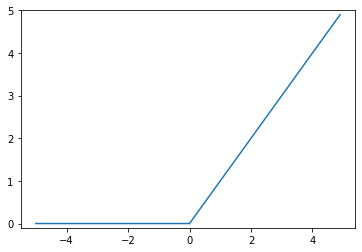

In [11]:
# ReLU 함수 구현
# ReLU 함수는 입력이 0을 넘으면 그대로 출력하고, 0 이하면 0을 출력하는 함수이다.
def relu(x):
    return np.maximum(0, x) # 넘파이 maximum 메서드를 사용하여 간단하게 구현 가능하다.

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

# 그래프작성
plt.plot(x,y) # x,y로 그래프 생성
plt.ylim(-0.1, 5) # y축 범위 지정
plt.show()

## 뉴럴 네트워크 행렬 곱

파이썬 넘파이에서 지원하는 행렬 곱을 사용하면 2차원 배열의 행렬 곱을 쉽게 구현할 수 있다.

행렬 곱을 사용하지 않으면 Y의 원소를 하나하나 따져봐야하는 번거로움이 있는데 이를 쉽게 해결 해준다.

In [12]:
# 신경망 행렬 곱
X = np.array([1,2])
print(X)
X.shape

W = np.array([[1,3,5],[2,4,6]])
print(W)
W.shape

Y = np.dot(X,W) # 행렬 곱 함수
print(Y)

[1 2]
[[1 3 5]
 [2 4 6]]
[ 5 11 17]


## 3층 뉴럴 네트워크 구현

행렬 곱 함수를 사용하여 실제 뉴럴 네트워크를 설계한다.

뉴럴 네트워크 설계시,

    입력: X
    가중치: W
    바이어스: B
    출력: A
    
로 표현하며, 출력은 활성화함수를 통하여 최종 출력 Z가 된다.

    식: Z = A(XW + B)

### Input layer to 1st layer

In [13]:
X = np.array([1.0,0.5])
W1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]]) # [1*2]*[2*3]
B1 = np.array([0.1,0.2,0.3]) # [1*3]+[1*3]
A1 = np.dot(X,W1) + B1 # [1*3]

# 은닉층에서 사용할 활성화함수: 시그모이드 함수
Z1 = sigmoid(A1)
print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


### 1st layer to 2nd layer

In [14]:
W2 = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]]) # [1*3]*[3*2]
B2 = np.array([0.1,0.2]) # [1*2]+[1*2]

A2 = np.dot(Z1,W2) + B2 # [1*2]
Z2 = sigmoid(A2)

### 2nd layer to 3rd layer

In [15]:
# 임의의 활성화 함수. 실제 네트워크에서는 Sigmoid, ReLU 함수 등으로 사용한다.
def identity_fn(x):
    return x

W3 = np.array([[0.1,0.3],[0.2,0.4]])
B3 = np.array([0.1,0.2])

A3 = np.dot(Z2,W3)+B3
Y = identity_fn(A3) # 마지막 활성화 함수는 값을 그대로 출력한다.
Y

array([0.31682708, 0.69627909])

### Output layer

출력층은 기계학습 문제에 따라 함수의 형태가 달라진다.

일반적으로 분류문제는 소프트맥스(Softmax) 함수, 회귀 문제는 항등함수를 사용한다. 회귀는 입력데이터에서 연속적인 수치를 예측하는 문제이다.

소프트맥스 함수의 형태는,

    (exp(현재 지수함수) / exp(전체 지수함수 합))
    
으로 구성된다.

In [18]:
a = np.array([0.3,2.9,4.0])
exp_a = np.exp(a)
print(exp_a)

sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y) 
print(np.sum(y))

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]
1.0


## 소프트맥스 함수 (Softmax Function)

소프트맥스 함수는 모든 요소의 합을 1로 정규화하는 특성을 갖는다. 이는 측정 결과치를 확률로 표현하는데에 용이하다.

    (exp(현재 지수함수) / exp(전체 지수함수 합))

분모와 분자에 어떤 동일한 정수값을 덧셈 계산해도 결과에 영향을 주지 않기 때문에 신호의 최대값을 빼주어 계산되는 값의 크기를 줄일 수 있다.

In [4]:
# 최종 소프트맥스 함수
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c) # 최대값 c를 빼서 오버플로우를 막는다.
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

# 소프트 맥스 함수를 사용하여 총합을 0~1사이의 실수조합으로 만들 수 있다.
a = np.array([0.3,2.9,4.0])
y = softmax(a)
print(y)
np.sum(y)
# 소프트맥스함수의 결과는 확률로 해석할 수 있다. (총합이 1이고 각각이 등장 확률)

[0.01821127 0.24519181 0.73659691]


1.0

## 손실 함수 (Loss function)

뉴럴 네트워크는 학습을 통해 최적의 가중치를 구하기 위한 지표로 손실 함수를 사용한다.

네트워크 학습의 최종 목표는 손실함수의 결과(오차)값을 최소화 하는 것이며, 이를 위해 가중치를 조작해나가게 된다.

### 평균 제곱 오차 (MSE)

평균의 제곱을 사용한 손실함수로 가장 기본적인 방법이다.

In [5]:
def MSE(y, t):
    return 0.5*np.sum((y-t)**2)

y1=[0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0] # 2로 추정
y2=[0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0] # 7로 추정
t=[0,0,1,0,0,0,0,0,0,0] # 정답 2
print(MSE(np.array(y1),np.array(t))) # 이때 추정 오차값이 낮을수록 정답에 가깝다
print(MSE(np.array(y2),np.array(t)))

0.09750000000000003
0.5975


### 교차 엔트로피 오차 (CEE)

자연로그를 사용하는 오차산출방법. 정답일때의 출력이 전체 값을 정하게 되며 작을 수록 정답에 가깝다.

In [7]:
def CEE(y, t):
    delta = 1e-7 # 아주 작은 값
    return -np.sum(t*np.log(y+delta)) # log0이 되면 -무한대가 되어 계산이 안되므로 델타를 더하여 0이 되지 않도록 한다.
print(CEE(np.array(y1),np.array(t))) # 오차가 낮을수록 정답에 가깝다
print(CEE(np.array(y2),np.array(t)))

0.510825457099338
2.302584092994546
